In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import datetime
from time import strftime

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier


from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC

from sklearn import model_selection
#Load the cross-validation method
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import accuracy_score
#Load the mean squared error method
from sklearn.metrics import mean_squared_error
#Load the function for creating a scorer
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_validate

In [2]:
# Here i used the cleaned data from the previous analysis-with EDA
#with some feature that i added before in the data analysis . 

In [3]:
df1 = pd.read_pickle('cleand_df.pkl')

In [4]:
df1.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Absent',
       'diff_day', 'ScheduledDay_day', 'ScheduledDay_hour',
       'ScheduledDay_month', 'ScheduledDay_weekday', 'AppointmentDay_day',
       'AppointmentDay_month', 'AppointmentDay_weekday', 'total_disease',
       'disease'],
      dtype='object')

Binary coding for the target 0 = show , 1 = no show , gender 0=male , 1 = female .
chnaging the 'diff_day' column to 'waiting days'


In [5]:
#Gender,disease column to binry 
df1['Gender']=(df1['Gender'] == 'F').astype('int')
df1=df1.rename(columns={'diff_day':'waiting_days'}) # rename thee target columns 

# drop feature

In [6]:
df1.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,waiting_days,ScheduledDay_day,ScheduledDay_hour,ScheduledDay_month,ScheduledDay_weekday,AppointmentDay_day,AppointmentDay_month,AppointmentDay_weekday,total_disease,disease
0,2.987250e+13,5642903,1,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,...,0,29,18,4,4,29,4,4,1,True
1,5.589978e+14,5642503,0,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,...,0,29,16,4,4,29,4,4,0,False
2,4.262962e+12,5642549,1,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,...,0,29,16,4,4,29,4,4,0,False
3,8.679512e+11,5642828,1,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,...,0,29,17,4,4,29,4,4,0,False
4,8.841186e+12,5642494,1,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,...,0,29,16,4,4,29,4,4,2,True


drop the patientid, appointment id, the dates of appointment day and the scheduled day
neighbrhoo from the original dataset.
dropping some feature that i added for the explarotary data analysis, like : 
'DayName_AppointmentDay','DayName_schedualed','age_ranges','categor_wait','ScheduledDay_minute'\
,'sum_missed_appointment','Appointment','total_prior_appointments','disease','missed_appointment_before'


In [7]:
col_todrop1=['PatientId','AppointmentID','ScheduledDay','AppointmentDay','Neighbourhood','disease']

In [8]:
#df1['Appointment']=1

In [9]:

df=df1.drop(col_todrop1,axis=1).copy()
df.shape

(110522, 18)

In [10]:
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Absent,waiting_days,ScheduledDay_day,ScheduledDay_hour,ScheduledDay_month,ScheduledDay_weekday,AppointmentDay_day,AppointmentDay_month,AppointmentDay_weekday,total_disease
0,1,62,0,1,0,0,0,0,0,0,29,18,4,4,29,4,4,1
1,0,56,0,0,0,0,0,0,0,0,29,16,4,4,29,4,4,0
2,1,62,0,0,0,0,0,0,0,0,29,16,4,4,29,4,4,0
3,1,8,0,0,0,0,0,0,0,0,29,17,4,4,29,4,4,0
4,1,56,0,1,1,0,0,0,0,0,29,16,4,4,29,4,4,2


# split the data 

In [11]:
from sklearn.model_selection import train_test_split
# Create feature and target arrays
y = df.Absent
X = df.drop('Absent', axis=1)

In [12]:
df.Absent.value_counts()

0    88208
1    22314
Name: Absent, dtype: int64

In [13]:
# Split into training and test set 20% test, 80% train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42,stratify=y)



# machine learning

here i built 3 functions , the first one called individual_classifiers 
with random forest, naive bayes, knn and random forest , all of them are with default parameter 
just to see the results with first data set that i used 


baseline -- these function take the train and the test set , 
#for every classifiers i used 5 fold cross validation for the train set, the scoring that i used is
['precision', 'recall', 'f1','accuracy']

In [14]:
def  individual_classifier (X_train, y_train,X_test,y_test):
#these function has individual classifiers, with random forest, naive bayes, knn and random forest
#all of them are with default parameter. just want to see the results with 5 fold cross validation.
# these function print a classification report for the test for every classifier. and return a dictionary with 
#the scoring of f1, recall,precision, accuracy for the test and train for each classifer 
#for each fold from the 5 fold cross validation

    SEED=1    
        # Instantiate lr
    lr = LogisticRegression(random_state=SEED)

        # Instantiate knn
    knn = KNeighborsClassifier(n_neighbors=7)


        # Instantiate rf
    rf=RandomForestClassifier(n_estimators=100,
                    random_state=SEED)

        # Instantiate naive bayes
    gnb = GaussianNB()

        # Instantiate SVM

        # Define the list classifiers
    classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn),('RandomForest',rf),\
                      ('gausian naive bayes',gnb)]
    # Iterate over the pre-defined list of classifiers
    accuracy_eval={}
    report=[]
    scoring = ['precision', 'recall', 'f1','accuracy']
    for clf_name, clf in classifiers:    
            cv1 = cross_validate(estimator=clf,
                                 X=X_train,
                                y=y_train,
                                cv=5,
                                scoring=scoring,return_train_score=True)
         
            clf.fit(X_train, y_train)    
            print('{:s}',clf_name)
            print(classification_report(y_test,clf.predict(X_test)))
            false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, clf.predict(X_test))
            roc_auc = auc(false_positive_rate, true_positive_rate)
            print('roc_auc is {:.3f}'.format(roc_auc))
            accuracy_eval[clf_name]=cv1
    return(accuracy_eval)       

In [15]:
def print_report(report1):
    # these function take the accuracy eval from the first function (the dictionary have also the precision , f1 score and recall)
    #and print the mean of the accuracy,f1,
    #recall for the 5 fold cross validation for each classifier
    
    for isbn in report1:    
        print('\nmodel:',isbn)
        print('test precision:',report1[isbn]['test_precision'].mean())
        print('test recall:',report1[isbn]['test_recall'].mean())
        print('test f1:',report1[isbn]['test_f1'].mean())
        print('test accuracy:',report1[isbn]['test_accuracy'].mean())

        print('train precision:',report1[isbn]['train_precision'].mean())
        print('train recall:',report1[isbn]['train_recall'].mean())
        print('train f1:',report1[isbn]['train_f1'].mean())
        print('train accuracy:',report1[isbn]['train_accuracy'].mean())    

In [16]:
import itertools

In [17]:
def report_figure(report_class,x=1):
    #these function take all the results of the 5 fold cross validation, and plot the results for each classifer
    # x is the number of the step- default is  1 , there is 3 steps that i used 
    # these function also use the accuracy_eval dictionary from the first function , and plot a figures for each
    #classifier, we can see if there is an overfitting or not, thesis function all the average metric 
    
    i=0
    #fig,ax=plt.subplots(1,4,sharey=True)
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(7, 3),sharey=True)
    #fig,axes = plt.figure()
    chunks=[]
    for isbn in report_class:
        axes[i] = fig.add_subplot()
        data=pd.DataFrame(columns=['train/test','metric','scroring_value'])
        data['train/test']=['train']*(20)+['test']*(20)
        data['metric']=['precision','recall','f1','accuracy']*(10)
        score_values_test= [[report_class[isbn]['train_precision'][j],\
        report_class[isbn]['train_recall'][j],\
        report_class[isbn]['train_f1'][j],\
        report_class[isbn]['train_accuracy'][j]] for j in range (5)]

        flatten_test =  list(itertools.chain.from_iterable(score_values_test))   


        score_values_train= [[report_class[isbn]['test_precision'][j],\
        report_class[isbn]['test_recall'][j],\
        report_class[isbn]['test_f1'][j],\
        report_class[isbn]['test_accuracy'][j]] for j in range (5)]

        flatten_train =  list(itertools.chain.from_iterable(score_values_train)) 

        data['scroring_value']=flatten_test+flatten_train
        data['model']=isbn
        data['report']=x
        axes[i]=sns.catplot(x="train/test", y="scroring_value", hue="metric", kind="point", data=data,\
                     capsize=0.01,title="model"+str(x));
        axes[i].fig.suptitle("model:"+str(isbn))
        #plt.bar(*zip(*dict_train.items()))
        plt.show()
        i+=1
        chunks.append(data)
        result=pd.concat(chunks)
        
    return result
    

here we can see the with the first dataset with 14 features - the is imbalanced 
we can see that all the classifers have a low precision and recall for the no show (1)

In [19]:
report1=individual_classifier(X_train, y_train,X_test,y_test)

{:s} Logistic Regression
              precision    recall  f1-score   support

           0       0.80      0.99      0.89     17642
           1       0.34      0.02      0.03      4463

    accuracy                           0.79     22105
   macro avg       0.57      0.50      0.46     22105
weighted avg       0.71      0.79      0.71     22105

roc_auc is 0.504
{:s} K Nearest Neighbours
              precision    recall  f1-score   support

           0       0.81      0.93      0.87     17642
           1       0.37      0.16      0.23      4463

    accuracy                           0.78     22105
   macro avg       0.59      0.55      0.55     22105
weighted avg       0.73      0.78      0.74     22105

roc_auc is 0.547
{:s} RandomForest
              precision    recall  f1-score   support

           0       0.82      0.92      0.87     17642
           1       0.40      0.21      0.28      4463

    accuracy                           0.78     22105
   macro avg       0.61  

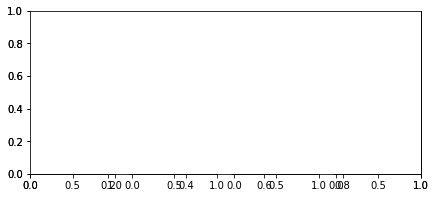

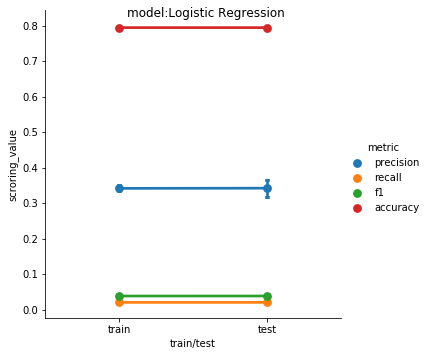

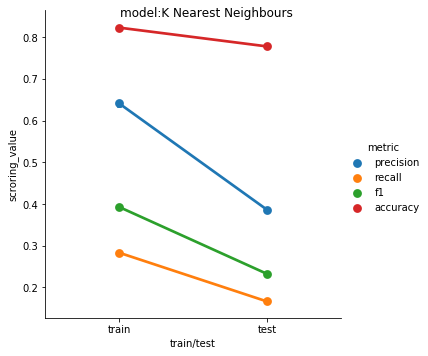

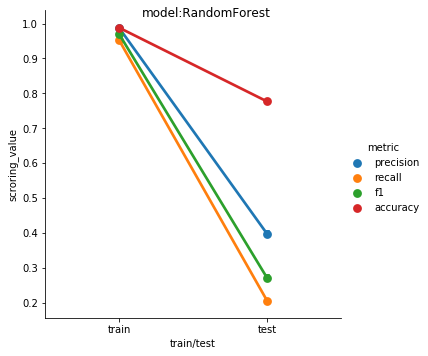

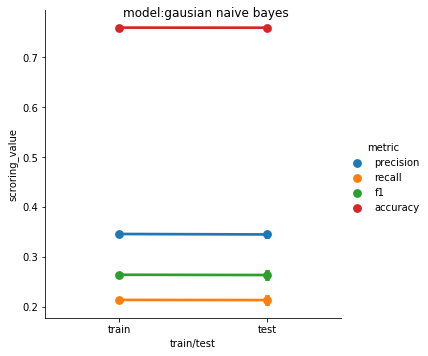

In [20]:
report_1=report_figure(report1,x=1)

here i used another classifiers like baging, adaboost, gradient boost, and xgboost, 
it look the same results as with the other classifiers that i used before 

# step2-balancing the data

There is a Class Imbalance in the data set, the no-show appointments only represent 20.2% 
of the response variable, appointment status. so these classifiers
maybe just predict the patient who came to their appointments (0).
The imbalanced nature of the data is addressed by implementing the Synthetic Minority 
Over-sampling Technique (SMOTE) algorithm. By utilizing the SMOTE algorithm, “the minority 
class is over-sampled by creating synthetic examples rather than by over-sampling
Wich allow the classifier to better learn the feature/target.



In [22]:
# here i will balance the data with smoote 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_step2,y_train2_step2=sm.fit_resample(X_train, y_train)

here we can see that after making SmOTE to the train data , the recall increasd in all classifier, but
it still low.

In [23]:
report2=individual_classifier(X_train_step2, y_train2_step2,X_test,y_test)


{:s} Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.66      0.74     17642
           1       0.27      0.51      0.35      4463

    accuracy                           0.63     22105
   macro avg       0.56      0.58      0.55     22105
weighted avg       0.73      0.63      0.66     22105

roc_auc is 0.581
{:s} K Nearest Neighbours
              precision    recall  f1-score   support

           0       0.86      0.67      0.76     17642
           1       0.31      0.58      0.40      4463

    accuracy                           0.65     22105
   macro avg       0.59      0.62      0.58     22105
weighted avg       0.75      0.65      0.68     22105

roc_auc is 0.624
{:s} RandomForest
              precision    recall  f1-score   support

           0       0.84      0.80      0.82     17642
           1       0.33      0.40      0.36      4463

    accuracy                           0.72     22105
   macro avg       0.59  

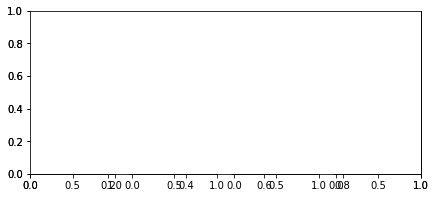

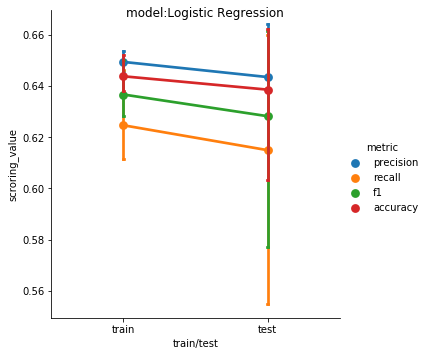

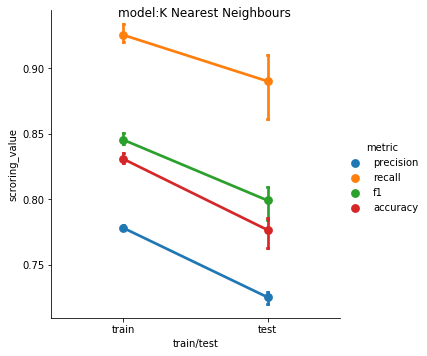

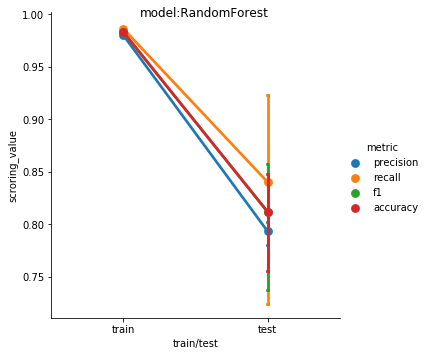

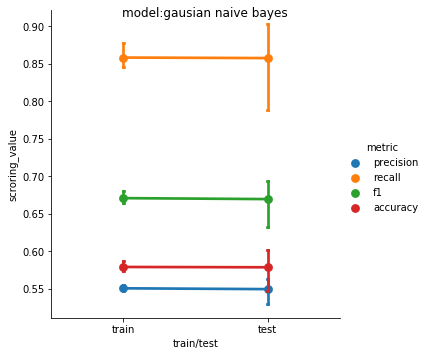

In [24]:
report_2=report_figure(report2,x=2)

here we see the smae results  with bagging classifiers ( with the SMOTE data )

# step3: add two features for the appointment history of the patient 

: I added two feature for the appointment history of the patient , one of them is for the total prior appointment 
    and the second one is for the total missed appointment . so every time the patient make a new appointment ,
    the total prior appointment and the total missed appointments will appear beside the patient’s information ,
    and it will updated when he 
    make a new appointment.

In [26]:
df1['Appointment']=1

In [27]:
prior_total_missed=df1.groupby('PatientId')['Absent'].cumsum().to_frame().rename\
(columns={'Absent':'prior_total_missed'})
# join the prior total missed appointement to the dataset 
df=df.merge(prior_total_missed , left_index =True, right_index=True, how = "outer")   

In [28]:
total_prior_appoitments=df1.groupby('PatientId')['Appointment'].cumsum().to_frame().rename\
(columns={'Appointment':'prior_total_appointments'})
df=df.merge(total_prior_appoitments , left_index =True, right_index=True, how = "outer")

In [29]:
df['prior_total_appointments']=df['prior_total_appointments']-1

In [30]:
df.columns

Index(['Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'Absent', 'waiting_days',
       'ScheduledDay_day', 'ScheduledDay_hour', 'ScheduledDay_month',
       'ScheduledDay_weekday', 'AppointmentDay_day', 'AppointmentDay_month',
       'AppointmentDay_weekday', 'total_disease', 'prior_total_missed',
       'prior_total_appointments'],
      dtype='object')

In [31]:

#df=df1.copy()
y=df.Absent
X = df.drop('Absent', axis=1)
# Split into training and test set
X_train_step3, X_test, y_train_step3, y_test = train_test_split(X, y, test_size = 0.2, random_state=42,stratify=y)

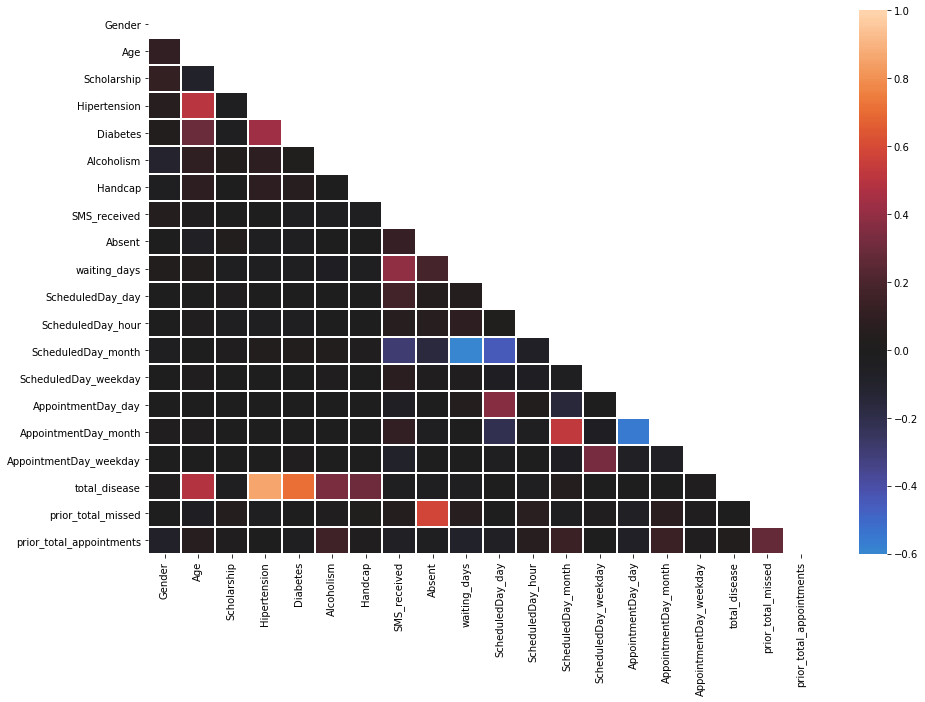

In [32]:
# Create the correlation matrix
#corr = df1.drop(col_todrop1,axis=1).corr()
corr=df.corr()
fig,ax= plt.subplots(figsize=(15,10))
# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, center=0, linewidths=1, fmt=".2f")
plt.show()

here we can see that the differnet classifers has a high accuracy, and high precision.

In [34]:
report3=individual_classifier(X_train_step3, y_train_step3,X_test,y_test)

{:s} Logistic Regression
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     17642
           1       0.86      0.82      0.84      4463

    accuracy                           0.94     22105
   macro avg       0.91      0.89      0.90     22105
weighted avg       0.94      0.94      0.94     22105

roc_auc is 0.895
{:s} K Nearest Neighbours
              precision    recall  f1-score   support

           0       0.83      0.95      0.89     17642
           1       0.57      0.25      0.35      4463

    accuracy                           0.81     22105
   macro avg       0.70      0.60      0.62     22105
weighted avg       0.78      0.81      0.78     22105

roc_auc is 0.601
{:s} RandomForest
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     17642
           1       0.86      0.87      0.86      4463

    accuracy                           0.94     22105
   macro avg       0.91  

In [35]:
print_report(report3)


model: Logistic Regression
test precision: 0.8645449830487199
test recall: 0.8288045388976089
test f1: 0.8462732745471151
test accuracy: 0.9392198219867562
train precision: 0.864533225140167
train recall: 0.8294213070705491
train f1: 0.8466122072701976
train accuracy: 0.9393216234269005

model: K Nearest Neighbours
test precision: 0.5543369305569239
test recall: 0.23393662141417754
test f1: 0.328971942655477
test accuracy: 0.8073334254496262
train precision: 0.7736047798432777
train recall: 0.3669262062362933
train f1: 0.4977545303742598
train accuracy: 0.850503861804602

model: RandomForest
test precision: 0.8515862987288635
test recall: 0.8694191381397139
test f1: 0.8603906978524838
test accuracy: 0.943042639401438
train precision: 0.9996778328865293
train recall: 0.999495829702233
train f1: 0.9995868158511737
train accuracy: 0.9998331769816747

model: gausian naive bayes
test precision: 0.6371388880529923
test recall: 0.6020952318199753
test f1: 0.6190667501296284
test accuracy: 0.

in the figure below we can see that there is maybe an overfittion, there is a difference between the train and
the test. so i choosed the logestec regression model becauce it has the best results after the random forest
and there is no overfitting

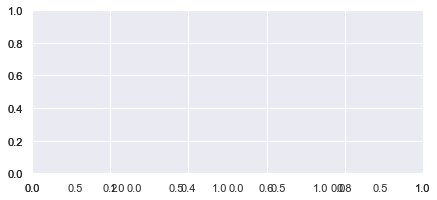

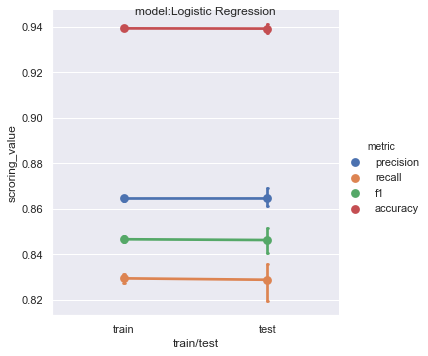

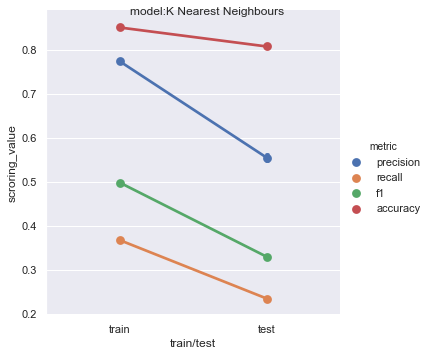

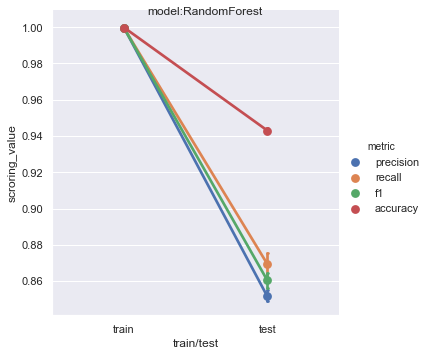

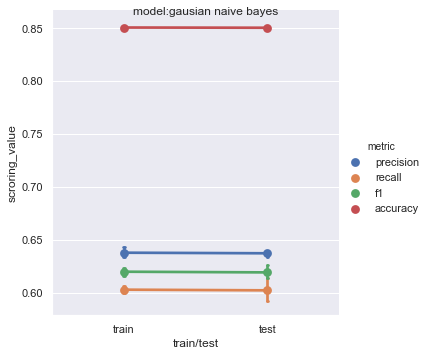

In [116]:
report_3=report_figure(report3,x=3)

here i used the bagging classifiers 

In [494]:
# making summary for the three steps that i used until the final model

In [118]:
report_summary=pd.concat([report_1,report_2,report_3])

In [119]:
report_summary

,train/test,metric,scroring_value,model,report
0,train,precision,0.331340,Logistic Regression,1
1,train,recall,0.019396,Logistic Regression,1
2,train,f1,0.036647,Logistic Regression,1
3,train,accuracy,0.794113,Logistic Regression,1
4,train,precision,0.337979,Logistic Regression,1
...,...,...,...,...,...
35,test,accuracy,0.849008,gausian naive bayes,3
36,test,precision,0.637552,gausian naive bayes,3
37,test,recall,0.601120,gausian naive bayes,3
38,test,f1,0.618800,gausian naive bayes,3


# summary for the three steps 

In [88]:
# here we can see a suumary for the three steps, and the metrics in each step, and we can se how 
#we improved all the model during the diffiernt three steps.

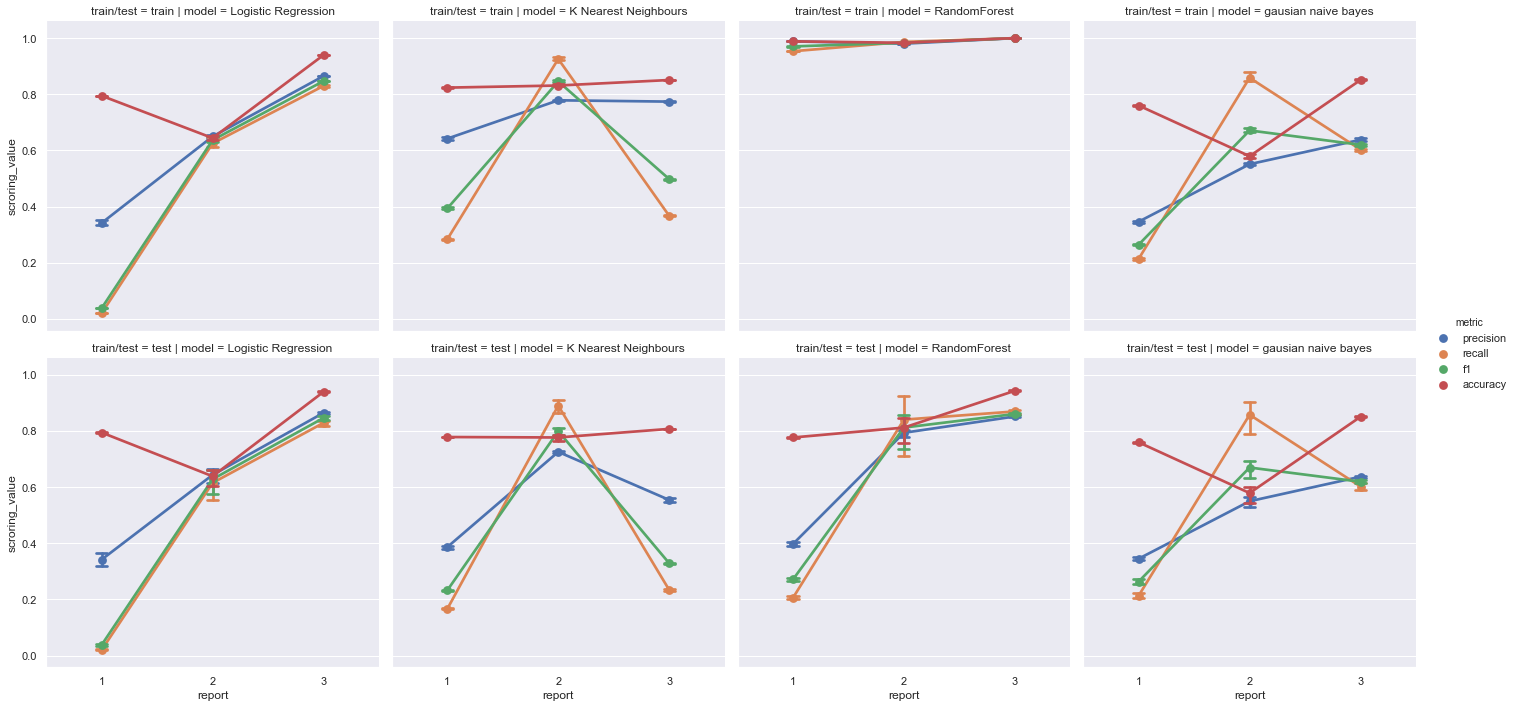

In [120]:
sns.set(rc={'figure.figsize':(15,10)})
sns.catplot(x="report", y="scroring_value", hue="metric", kind="point" ,col='model',row='train/test', order=[1, 2, 3] ,capsize=0.1, data=report_summary)            


# logestic regression

In [37]:
#reate the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train_step3,y_train_step3)

# Predict the labels of the test set: y_pred
y_pred_logreg = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

[[17046   596]
 [  790  3673]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     17642
           1       0.86      0.82      0.84      4463

    accuracy                           0.94     22105
   macro avg       0.91      0.89      0.90     22105
weighted avg       0.94      0.94      0.94     22105



In [38]:
# Set up cross_val_score
cv = cross_val_score(estimator=logreg,
                     X=X_train_step3,
                     y=y_train_step3,
                     cv=10,
                     scoring='f1')

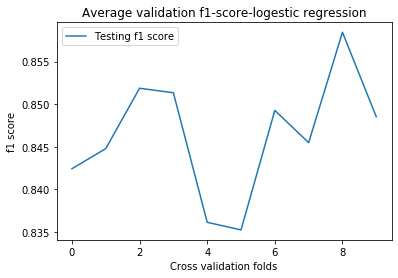

In [40]:
plt.title('Average validation f1-score-logestic regression')
plt.plot(cv, label = 'Testing f1 score')
plt.legend()
plt.xlabel('Cross validation folds')
plt.ylabel('f1 score')
plt.show()

##  Plotting an ROC curve
Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while ROC curves provide a way to visually evaluate models.

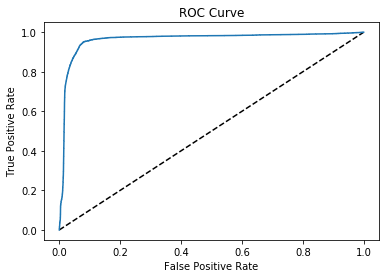

In [41]:

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## AUC computation
it is informative metric to evaluate a model. If the AUC is greater than 0.5, the model is better than random guessing. Always a good sign!

In [42]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))




AUC: 0.9621598482101877


### feature importance by logestic regression

In [47]:
list(enumerate(importance_log))

[(0, -0.0772059794222863),
 (1, -0.004103687361190135),
 (2, -0.04055720538431245),
 (3, -0.03172861988029273),
 (4, 0.015034619756649428),
 (5, 0.11223257793640841),
 (6, -0.04643503504705829),
 (7, 0.4317281383499151),
 (8, 0.012878173914217894),
 (9, -0.0045602113248566015),
 (10, -0.00024317505255727254),
 (11, -0.24243535377591136),
 (12, -0.024098585409980576),
 (13, -0.005609453994644651),
 (14, -0.32365018618171354),
 (15, 0.003059568083089527),
 (16, 0.049103542765709954),
 (17, 4.3602971915966044),
 (18, -1.1524199577922383)]

Feature: 0, Score: -0.07721
Feature: 1, Score: -0.00410
Feature: 2, Score: -0.04056
Feature: 3, Score: -0.03173
Feature: 4, Score: 0.01503
Feature: 5, Score: 0.11223
Feature: 6, Score: -0.04644
Feature: 7, Score: 0.43173
Feature: 8, Score: 0.01288
Feature: 9, Score: -0.00456
Feature: 10, Score: -0.00024
Feature: 11, Score: -0.24244
Feature: 12, Score: -0.02410
Feature: 13, Score: -0.00561
Feature: 14, Score: -0.32365
Feature: 15, Score: 0.00306
Feature: 16, Score: 0.04910
Feature: 17, Score: 4.36030
Feature: 18, Score: -1.15242


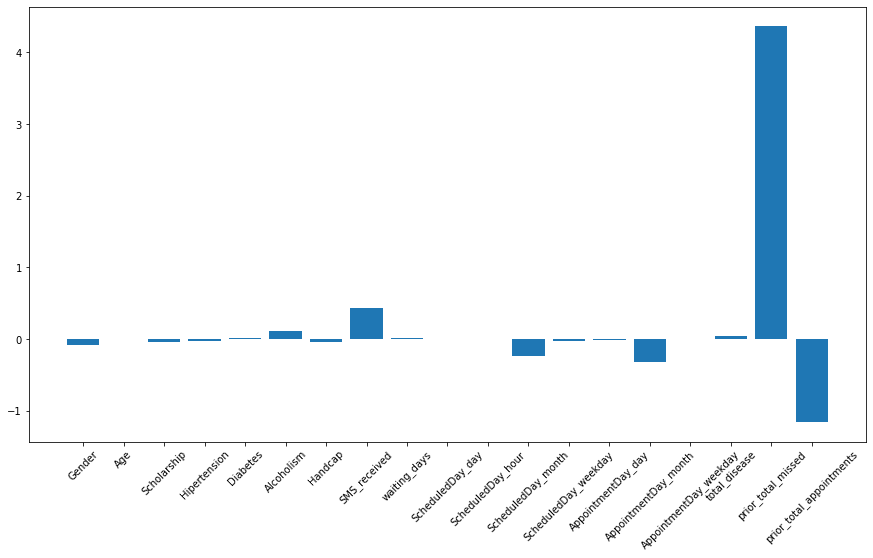

In [50]:
# get importance
fig,ax=plt.subplots(figsize=(15,8))
importance_log = logreg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance_log):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
ax.bar([x for x in range(len(importance_log))], importance_log,tick_label=X_train_step3.columns.tolist())
plt.xticks(rotation=45)
plt.show()

In [335]:
# here is my final model that i used for the dataset

In [66]:

from sklearn.externals import joblib
joblib.dump(logreg, 'logreg_final.pkl')


 

['logreg_final.pkl']

In [67]:
df.to_pickle('no_show_final16_feaures.pkl') 

# Hyper parameter tuning for logestic regression

In [51]:
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
from sklearn.model_selection import GridSearchCV
import time

In [53]:
dual=[True,False]
max_iter=[100,110,120,130,140]
param_grid = dict(dual=dual,max_iter=max_iter)
c_space = np.logspace(-5, 8, 15)

In [63]:
lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 5, n_jobs=-1)
start_time = time.time()
grid_result = grid.fit(X_train_step3,y_train_step3)

In [64]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.939559 using {'dual': False, 'max_iter': 130}


In [65]:
grid_result.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=130,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)